In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as spi
plt.style.use('seaborn-white')
%matplotlib inline

In [29]:
import importlib
import util
util = importlib.reload(util)
from util import LTB

In [60]:
length_scale = 3.086e22
H_0 = 7.56e-27 * length_scale
c = 299792458
G = 6.67408e-11

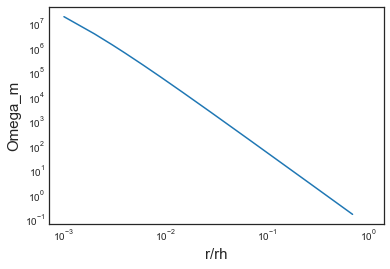

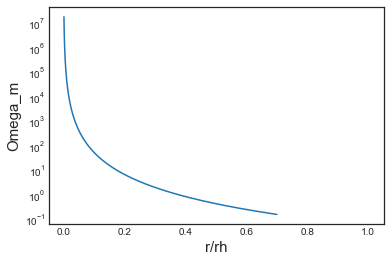

In [73]:
ltb = LTB()
rs = ltb.rs()[1:]
rhos = [ltb.rho(r) for r in rs]
# print(rhos)
omega_ms = np.array(rhos)*8*np.pi/(3*H_0**2)
plt.loglog(rs/ltb.initial_rh(), omega_ms)
plt.xlabel('r/rh', fontsize=15)
plt.ylabel('Omega_m', fontsize=15)
plt.figure()
plt.semilogy(rs/ltb.initial_rh(), omega_ms)
plt.xlabel('r/rh', fontsize=15)
plt.ylabel('Omega_m', fontsize=15)
# plt.plot(rs/ltb.initial_rh(), rhos)

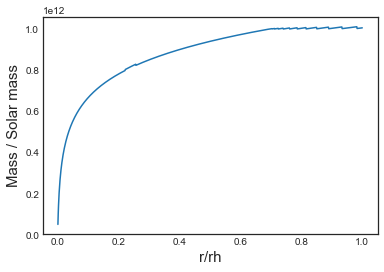

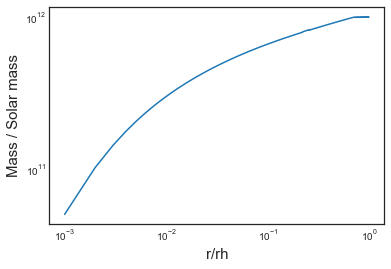

In [71]:
ms = [ltb.mass(r) for r in rs]
m_normal_units = np.array(ms) * length_scale * c**2/G / (2e30) ## scaled by solar mass
plt.plot(rs/ltb.initial_rh(), m_normal_units)
plt.xlabel('r/rh', fontsize=15)
plt.ylabel('Mass / Solar mass', fontsize=15)
plt.figure()
plt.loglog(rs/ltb.initial_rh(), m_normal_units)
plt.xlabel('r/rh', fontsize=15)
plt.ylabel('Mass / Solar mass', fontsize=15)

In [44]:
def f(P, r):
    current_rho = ltb.rho(r)
    current_m = ltb.mass(r)
    Lambda = 0
    E = -2*current_m/r - Lambda*r**2/3
    return (current_rho + P)/2/(1+E)/r*(Lambda*r**2 - 8*np.pi*P*r**2 + E)
from scipy.integrate import odeint
pressure_rs = np.linspace(0, ltb.initial_rh(), 1000)[1:][::-1]
pressure = odeint(f, 0, pressure_rs)

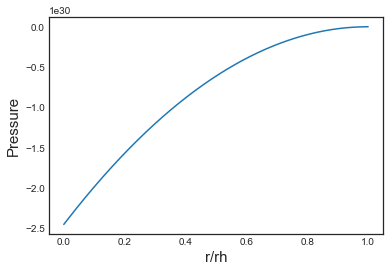

In [72]:
plt.plot(pressure_rs/ltb.initial_rh(), pressure*c**4/G)
plt.xlabel('r/rh', fontsize=15)
plt.ylabel('Pressure', fontsize=15)